<a href="https://colab.research.google.com/github/kridtapon/ASI-OBV-Momentum-Strategy/blob/main/ASI_OBV_Momentum_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00


In [ ]:
pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.54
    Uninstalling yfinance-0.2.54:
      Successfully uninstalled yfinance-0.2.54


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate the Absolute Strength Index (ASI)
def calculate_asi(df, short_period=14, long_period=28):
    """
    Calculate the Absolute Strength Index (ASI).
    """
    short_ma = df['Close'].rolling(window=short_period).mean()
    long_ma = df['Close'].rolling(window=long_period).mean()

    asi = (short_ma - long_ma) / long_ma * 100
    return asi

# Function to calculate On-Balance Volume (OBV)
def calculate_obv(df):
    """
    Calculate On-Balance Volume (OBV).
    """
    obv = [0]  # Initial OBV value
    for i in range(1, len(df)):
        if df['Close'][i] > df['Close'][i-1]:
            obv.append(obv[-1] + df['Volume'][i])  # Volume is added when the price closes higher
        elif df['Close'][i] < df['Close'][i-1]:
            obv.append(obv[-1] - df['Volume'][i])  # Volume is subtracted when the price closes lower
        else:
            obv.append(obv[-1])  # No change in OBV if the price is unchanged
    return pd.Series(obv, index=df.index)

# Define the stock symbol and time period
symbol = 'GE'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Absolute Strength Index (ASI)
df['ASI'] = calculate_asi(df)

# Calculate On-Balance Volume (OBV)
df['OBV'] = calculate_obv(df)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on ASI and OBV
# Entry: ASI crosses above 50 and OBV is trending upward
df['Entry'] = (df['ASI'] > 0) & (df['OBV'] > df['OBV'].shift(5))

# Exit: ASI crosses below 50 and OBV is trending downward
df['Exit'] = (df['ASI'] < 0) & (df['OBV'] < df['OBV'].shift(5))

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-6-29f3499c0119>:24: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-6-29f3499c0119>:25: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-6-29f3499c0119>:26: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-6-29f3499c0119>:27: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future 

Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  303722.313847
Total Return [%]                              203.722314
Benchmark Return [%]                          186.772103
Max Gross Exposure [%]                             100.0
Total Fees Paid                               7116.45994
Max Drawdown [%]                               43.023069
Max Drawdown Duration                  598 days 00:00:00
Total Trades                                          20
Total Closed Trades                                   20
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                        35.0
Best Trade [%]                                  80.48008
Worst Trade [%]                

Streaming output truncated to the last 5000 lines.
<ipython-input-10-4403a8a88c37>:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-4403a8a88c37>:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-10-4403a8a88c37>:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-10-4403a8a88c37>:22: FutureWarning:

Series.__getitem__ treating key

Best Parameters:
short_period        12.0000
long_period         31.0000
shift_parameter      7.0000
total_return       371.2469
Name: 296, dtype: float64


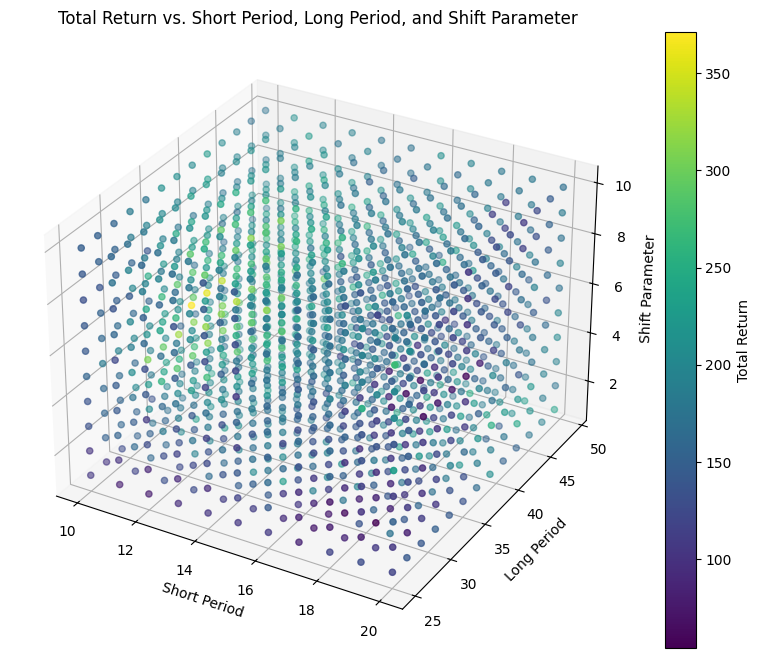

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate the Absolute Strength Index (ASI)
def calculate_asi(df, short_period=14, long_period=28):
    short_ma = df['Close'].rolling(window=short_period).mean()
    long_ma = df['Close'].rolling(window=long_period).mean()
    asi = (short_ma - long_ma) / long_ma * 100
    return asi

# Function to calculate On-Balance Volume (OBV)
def calculate_obv(df):
    obv = [0]  # Initial OBV value
    for i in range(1, len(df)):
        if df['Close'][i] > df['Close'][i-1]:
            obv.append(obv[-1] + df['Volume'][i])  # Volume is added when the price closes higher
        elif df['Close'][i] < df['Close'][i-1]:
            obv.append(obv[-1] - df['Volume'][i])  # Volume is subtracted when the price closes lower
        else:
            obv.append(obv[-1])  # No change in OBV if the price is unchanged
    return pd.Series(obv, index=df.index)

# Define the stock symbol and time period
symbol = 'GE'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Define the grid for optimization
short_period_range = range(10, 21)  # Short period from 10 to 20
long_period_range = range(25, 50, 2)   # Long period from 25 to 50
shift_range = range(1, 11)           # Shift parameter from 1 to 5

# Create the parameter combinations using product
param_grid = product(short_period_range, long_period_range, shift_range)

# Store results
results = []

# Loop over each combination of parameters
for short_period, long_period, shift_parameter in param_grid:
    # Calculate ASI and OBV
    df['ASI'] = calculate_asi(df, short_period, long_period)
    df['OBV'] = calculate_obv(df)

    # Filter data for the test period (2020-2025)
    df_test = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Define Entry and Exit signals
    df_test['Entry'] = (df_test['ASI'] > 0) & (df_test['OBV'] > df_test['OBV'].shift(shift_parameter))
    df_test['Exit'] = (df_test['ASI'] < 0) & (df_test['OBV'] < df_test['OBV'].shift(shift_parameter))

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_test['Close'],
        entries=df_test['Entry'],
        exits=df_test['Exit'],
        init_cash=100_000,
        fees=0.001,
        freq='D'
    )

    # Collect performance metrics (e.g., total return, Sharpe ratio)
    performance = portfolio.stats()
    results.append({
        'short_period': short_period,
        'long_period': long_period,
        'shift_parameter': shift_parameter,
        'total_return': performance['Total Return [%]']
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by total return (or Sharpe ratio, depending on your objective)
best_params = results_df.sort_values(by='total_return', ascending=False).iloc[0]

# Print the best parameters and performance
print("Best Parameters:")
print(best_params)

# 3D plot of total return across the parameter grid
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for plotting
X = results_df['short_period'].values
Y = results_df['long_period'].values
Z = results_df['shift_parameter'].values
total_return = results_df['total_return'].values

# Plot a 3D scatter plot
sc = ax.scatter(X, Y, Z, c=total_return, cmap='viridis', marker='o')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Total Return')

# Labels and title
ax.set_xlabel('Short Period')
ax.set_ylabel('Long Period')
ax.set_zlabel('Shift Parameter')
ax.set_title('Total Return vs. Short Period, Long Period, and Shift Parameter')

# Show the plot
plt.show()


In [ ]:
# Calculate Absolute Strength Index (ASI)
df['ASI'] = calculate_asi(df, short_period=12, long_period=31)

# Calculate On-Balance Volume (OBV)
df['OBV'] = calculate_obv(df)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on ASI and OBV
# Entry: ASI crosses above 50 and OBV is trending upward
df['Entry'] = (df['ASI'] > 0) & (df['OBV'] > df['OBV'].shift(7))

# Exit: ASI crosses below 50 and OBV is trending downward
df['Exit'] = (df['ASI'] < 0) & (df['OBV'] < df['OBV'].shift(7))

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

<ipython-input-10-4403a8a88c37>:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-10-4403a8a88c37>:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-10-4403a8a88c37>:22: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-10-4403a8a88c37>:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  471246.899889
Total Return [%]                                371.2469
Benchmark Return [%]                          186.772103
Max Gross Exposure [%]                             100.0
Total Fees Paid                              6634.475517
Max Drawdown [%]                               29.841042
Max Drawdown Duration                  480 days 00:00:00
Total Trades                                          15
Total Closed Trades                                   15
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   46.666667
Best Trade [%]                                114.624105
Worst Trade [%]                

[*********************100%***********************]  1 of 1 completed
<ipython-input-12-4adae8cebd57>:24: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-12-4adae8cebd57>:25: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-12-4adae8cebd57>:26: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-12-4adae8cebd57>:27: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a fut

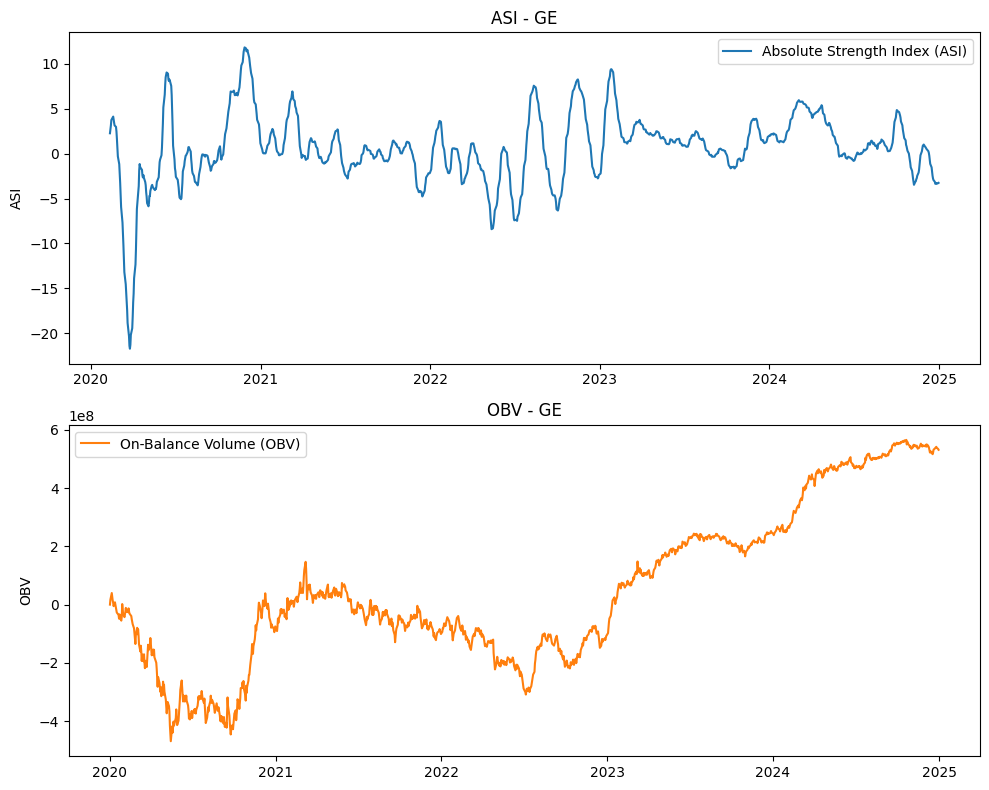

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate the Absolute Strength Index (ASI)
def calculate_asi(df, short_period=14, long_period=28):
    """
    Calculate the Absolute Strength Index (ASI).
    """
    short_ma = df['Close'].rolling(window=short_period).mean()
    long_ma = df['Close'].rolling(window=long_period).mean()

    asi = (short_ma - long_ma) / long_ma * 100
    return asi

# Function to calculate On-Balance Volume (OBV)
def calculate_obv(df):
    """
    Calculate On-Balance Volume (OBV).
    """
    obv = [0]  # Initial OBV value
    for i in range(1, len(df)):
        if df['Close'][i] > df['Close'][i-1]:
            obv.append(obv[-1] + df['Volume'][i])  # Volume is added when the price closes higher
        elif df['Close'][i] < df['Close'][i-1]:
            obv.append(obv[-1] - df['Volume'][i])  # Volume is subtracted when the price closes lower
        else:
            obv.append(obv[-1])  # No change in OBV if the price is unchanged
    return pd.Series(obv, index=df.index)

# Define the stock symbol and time period
symbol = 'GE'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate ASI and OBV
df['ASI'] = calculate_asi(df)
df['OBV'] = calculate_obv(df)

# Plot the ASI and OBV indicators
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot ASI
ax1.plot(df.index, df['ASI'], label='Absolute Strength Index (ASI)', color='tab:blue')
ax1.set_title(f'ASI - {symbol}')
ax1.set_ylabel('ASI')
ax1.legend(loc='best')

# Plot OBV
ax2.plot(df.index, df['OBV'], label='On-Balance Volume (OBV)', color='tab:orange')
ax2.set_title(f'OBV - {symbol}')
ax2.set_ylabel('OBV')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()
